# Présentation générale du jeu de données

Installation des différents packages :

requirement.txt

Chargement de la librairie Panda qui permet de manipuler des données dans des dataframes notamment

In [91]:
import pandas as pd
import numpy as np
import missingno
import maplotlib
import scipy.stats
import seaborn as sns

import de nos données csv

In [277]:
data = pd.read_csv("p2-arbres-fr.csv", sep=";")

Visualisation des 5 premieres lignes de notre jeu de données

In [3]:
data.head(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [16]:
data.tail(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956
200136,2024745,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170155,Raisinier,Hovenia,dulcis,NaN,0,0,NaN,0.0,48.820445,2.454856


Regardons le nombre de lignes et le nombre de colonnes du jeu de données

In [4]:
data.shape

(200137, 18)

Regardons les types des colonnes et le nombre de lignes non vides

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [34]:
list(data)

['id',
 'type_emplacement',
 'domanialite',
 'arrondissement',
 'complement_addresse',
 'numero',
 'lieu',
 'id_emplacement',
 'libelle_francais',
 'genre',
 'espece',
 'variete',
 'circonference_cm',
 'hauteur_m',
 'stade_developpement',
 'remarquable',
 'geo_point_2d_a',
 'geo_point_2d_b']

Regardons s'il y a des doublons (lignes identiques)

In [20]:
len(data.id.unique())

200137

In [22]:
len(data.id)

200137

On n'a donc pas de doublons.

Regardons les données manquantes

In [389]:
data.isnull().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
lieu                        0
id_emplacement              0
libelle_francais            0
genre                       0
espece                      0
variete                163255
circonference_cm            0
hauteur_m                   0
stade_developpement     67202
remarquable                 0
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

In [ ]:
Nous observons des valeurs manquantes. Regardons plus précisément ceci en traçant une matrice.

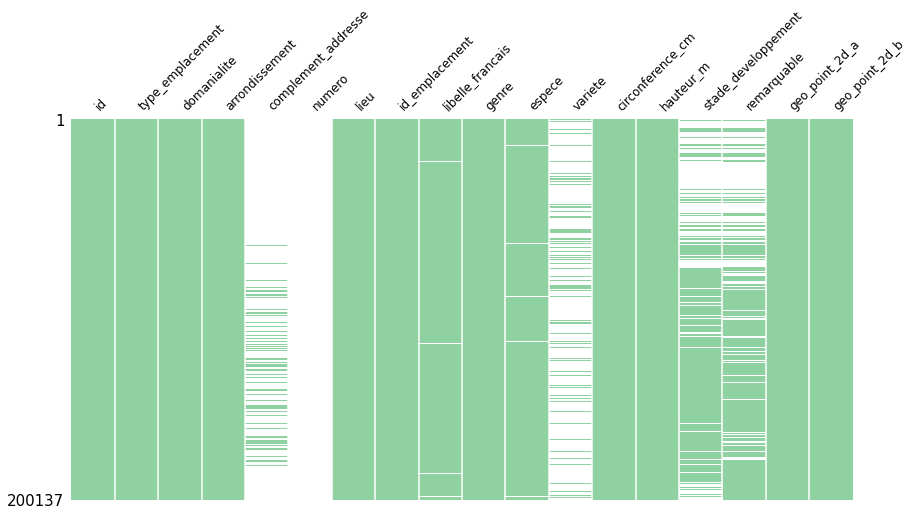

In [23]:
missingno.matrix(data, figsize=(14,7), fontsize=12, color=(0.564, 0.823, 0.631), sparkline=False);

On voit que la colonne "numero" n'a pas de données.
La colonne complément d'adresse n'a que très peu de données renseignées mais ceci parait logique. 
Nous avons les coordonnées des points. Donc il ne semble pas utile de conserver les colonnes "complement_adresse" et "numero".


In [238]:
del data['numero']

In [239]:
del data['complement_addresse']

Il manque quelques données concernant la colonne "libelle_francais" qui est le nom de l'arbre, de même pour la colonne "espèce", mais nous avons le genre. Nous pouvons pour l'instant conserver ces données.

On n'a pas beaucoup de données pour la colonne "variete", il faudra donc étudier de plus près cette colonne.

Il manque aussi beaucoup de données sur les colonnes stade_developpement et sur la colonne remarquable.
Regardons les valeurs uniques de ces colonnes

Commençons par la colonne "remarquable"

In [24]:
data.remarquable.unique()

array([ 0., nan,  1.])

Les arbres remarquables de France sont des arbres vivants exceptionnels
par leur âge, leurs dimensions, leur forme, leur passé ou encore leur légende

Il convient peut être de traiter différement les arbres remarquables des autres. Si nous n'avons pas d'information, nous considerons que l'arbre n'est pas remarquable.

In [240]:
data['remarquable'].fillna(0, inplace=True)

On vérifie la correction des valeurs manquantes pour la colonne "remarquable"

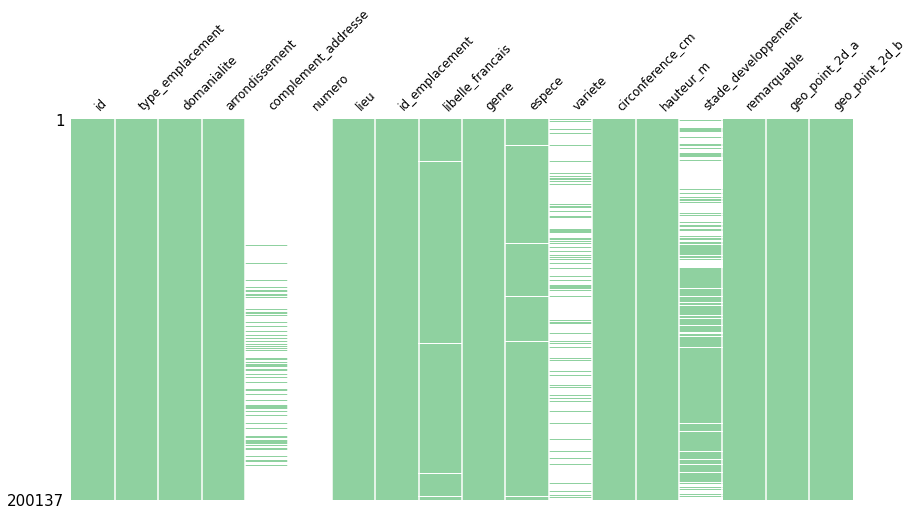

In [26]:
missingno.matrix(data, figsize=(14,7), fontsize=12, color=(0.564, 0.823, 0.631), sparkline=False);

Regardons la colonne variete et stade_developpement

In [27]:
data.variete.unique()

array([nan, "Atropunicea'", "Euchlora'", "Schwedleri'", "Pissardii'",
       "Pallida'", 'n. sp.', "Chanticleer'", "Purpureum'", "Italica'",
       "Aspleniifolia'", "Jacquemontii'", "Fastigiata'",
       "Fastigiate Koster'", "Imperialis'", "Honey Dew'",
       "Jacqueline Hillier'", "Rubra Plena'", "Diversifolia'",
       "Flamingo'", "Argentea Marginata'", "Pendula'", "Liempde'",
       "Pyramidalis'", "Tortuosa'", "Aurea'", "Frisia'", "Leopoldii'",
       "Aldenhamensis'", "Briotii'", "Kanzan'", "Variegata'", "Hizakura'",
       "Albomarginata'", "Bradford'", "Autumnalis Rosea'",
       "Atropurpurea'", "Castanaefolia'", "Eddie's White Wonder'",
       "Autumnalis'", "Heaven Scent'", "Schouten'", "Sundew'",
       "Leonard messel'", "Merrill'", "Plena'", "Unifolia'", "Accolade'",
       "Baumannii'", "Virginiana'", "Flying Dragon'", "Laciniata'",
       "Laciniatum'", "Globosum'", "Rohanii'", "Golden Hornet'",
       "Glauca'", "Youngii'", "Contorta'", "Umbraculifera'", "Jaspidea'"

In [28]:
data.variete.describe()

count          36777
unique           436
top       Baumannii'
freq            4538
Name: variete, dtype: object

Je ne pense pas que cela soit pertinent d'intégrer cette colonne dans l'analyse, 
il manque trop d'information pour la plupart des lignes de notre jeu de données. On a que 18% environ de données pour cette colonne.

In [171]:
#del data['variete']

In [ ]:
Regardons la colonne stade_developpement

In [32]:
data.stade_developpement.unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

On a les choix adulte, jeune, mature, jeune adulte.
Regardons le % de données que nous avons

In [34]:
data.stade_developpement.describe()

count     132932
unique         4
top            A
freq       64438
Name: stade_developpement, dtype: object

In [ ]:
Nous avons 66% environs des données remplies. Nous conservons la colonne telle quelle.

# Démarche méthodologique d’analyse de données 

vérifier les données manquantes
vérifier les données dites aberrantes
regarder les tendances centrales : moyenne, mediane...
la dispersion : variance, ecart-type..
la forme des données: asymetrie...
regarder les correlations ? stats bi variée ?

Maintenant que nous avons traité les doublons et les valeurs manquantes. Nous allons étudier nos variables quantitatives : circonference_cm et hauteur_m.

## 1) Variables quantitatives

Le but ici est d'étudier chaque variable afin de découvrir les informations qu'elles peuvent nous apporter et de detecter les éventuelles valeurs anodines dites "valeurs aberrantes"

Regardons nos variables quantitatives de manière générale.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   lieu                 200137 non-null  object 
 5   id_emplacement       200137 non-null  object 
 6   libelle_francais     198640 non-null  object 
 7   genre                200121 non-null  object 
 8   espece               198385 non-null  object 
 9   circonference_cm     200137 non-null  int64  
 10  hauteur_m            200137 non-null  int64  
 11  stade_developpement  132932 non-null  object 
 12  remarquable          200137 non-null  float64
 13  geo_point_2d_a       200137 non-null  float64
 14  geo_point_2d_b       200137 non-null  float64
dtypes: float64(3), in

In [48]:
data[["circonference_cm", "hauteur_m"]].describe().round(2)

,circonference_cm,hauteur_m
count,200137.00,200137.00
mean,83.38,13.11
std,673.19,1971.22
min,0.00,0.00
25%,30.00,5.00
50%,70.00,8.00
75%,115.00,12.00
max,250255.00,881818.00


On voit qu'en moyenne un arbre a une circonference de 83 cm et une hauteur de 13 mètres.
50% des arbres ont au moins une circonférence de 70 cm et 50% des arbres ont au moins une hauteur de 8 mètre.
Les données sont très dispersées pour ces deux colonnes. 
Vérifions cela en traçant les boites à moustache.

<AxesSubplot:>

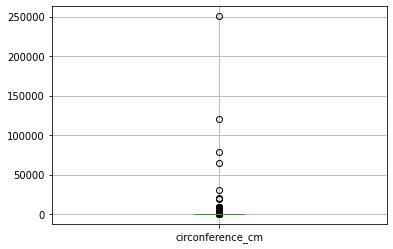

In [42]:
data.boxplot(column="circonference_cm").set_title('Boite à moustache - "Circonference_cm"')

On observe des valeurs très extrêmes. 
Si on fait une recherche sur internet, on sait que :
L'arbre avec la plus grande circonférence connue aujourd'hui à Paris est un platane d’Orient du Parc Monceau.
son tronc mesure 7 mètres de circonférence pour une hauteur de 31 mètres environ.
info sur : https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris
Nous pouvons supprimer les données supérieurs à 701 cm.

In [380]:
data = data.loc[data["circonference_cm"] <= 701]

In [381]:
data[["circonference_cm", "hauteur_m"]].describe().round(2)

,circonference_cm,hauteur_m
count,200022.00,200022.0
mean,79.62,8.5
std,62.91,7.4
min,0.00,0.0
25%,30.00,5.0
50%,70.00,8.0
75%,115.00,12.0
max,700.00,327.0


Text(0.5, 1.0, 'Boîte à moustache - "Circonference_cm"')

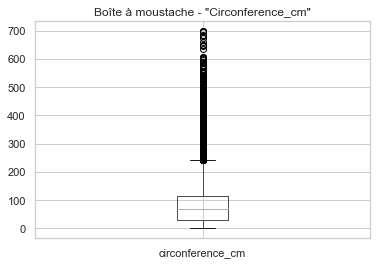

In [383]:
data.boxplot(column="circonference_cm" ).set_title('Boîte à moustache - "Circonference_cm"')

Nous observons encore des données qui sortent de l'ordinaire mais elles sont cohérentes. Nous les conservons pour ne pas perdre d'informations.

Nous observons que le minimum est 0. Ceci parait étonnant qu'un arbre ne puisse pas avoir de circonférence. 
Nous ne trouvons pas de données sur internet concernant l'arbre le plus fin à Paris.
Nous pouvons utiliser la formule de IQR pour supprimer les données dites "aberrantes".

In [390]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    print(np.quantile(s, 0.25))
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

In [391]:
outliers(data.circonference_cm)

30.0


,sub,values
0,IQR,85.000000
1,Upper Bound,242.500000
2,Lower Bound,-97.500000
3,Sum outliers,3327.000000
4,percentage outliers,1.663317


Concernant la valeur 0 de l'arbre le plus fin, selon la formule du IQR, on n'a pas de valeur aberrante.
Nous allons donc simplement supprimer les données à 0 qui ne sont pas possible pour un arbre.

In [392]:
data = data.loc[data["circonference_cm"] > 0]

In [394]:
data["circonference_cm"].describe().round(2)

count    174155.00
mean         91.44
std          58.86
min           1.00
25%          45.00
50%          80.00
75%         122.00
max         700.00
Name: circonference_cm, dtype: float64

Text(0.5, 1.0, 'Boîte à moustache - "Circonference_cm"')

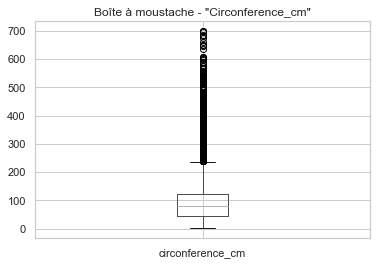

In [393]:
data.boxplot(column="circonference_cm" ).set_title('Boîte à moustache - "Circonference_cm"')

Nous observons que les valeurs sont aussi très dispersées. Nous avons beaucoup de valeurs extrêmes.
75% des arbres ont une circonférence en dessous de 122 cm.

In [395]:
scipy.stats.normaltest(data.circonference_cm)

NormaltestResult(statistic=43529.74434735392, pvalue=0.0)

<AxesSubplot:ylabel='Frequency'>

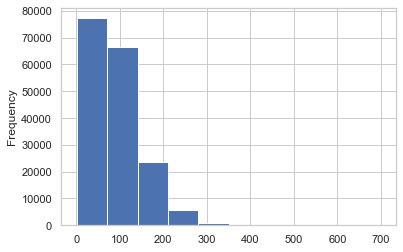

In [397]:
data.circonference_cm.plot(kind='hist')

In [ ]:
Il serait judicieux de faire des intervalles.

Regardons à présent la variable hauteur_m

In [ ]:
Faisons un violinplot

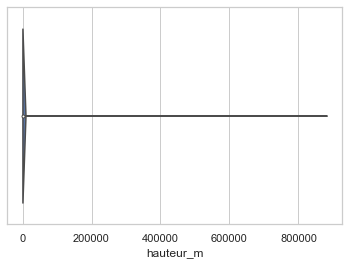

In [75]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=data["hauteur_m"])

ici encore nous observons des valeurs aberrantes.
En effet, l'arbre le plus grand connu actuellement à Paris porte le nom de Séquoia. Il se trouve aux Buttes-Chaumont et mesure 35 mètres.
https://www.unjourdeplusaparis.com/paris-vert/arbres-remarquables-paris
Nous pouvons supprimer les données supérieures à 40 mètres.

In [398]:
data = data.loc[data["hauteur_m"] <= 40]

In [399]:
data["hauteur_m"].describe().round(2)

count    173713.00
mean          9.55
std           5.68
min           0.00
25%           5.00
50%          10.00
75%          13.00
max          40.00
Name: hauteur_m, dtype: float64

Le minimum est 0, ce qui n'est pas possible pour un arbre.
Regardons l'IQR.

In [ ]:
Réalisons un boxplot

<AxesSubplot:>

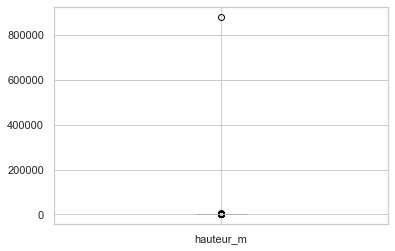

In [76]:
data.boxplot(column="hauteur_m" )

supprimons les données supérieures à 500 pour commencer

In [401]:
outliers(data.hauteur_m)

5.0


,sub,values
0,IQR,8.00000
1,Upper Bound,25.00000
2,Lower Bound,-7.00000
3,Sum outliers,906.00000
4,percentage outliers,0.52155


Les données dites aberrantes sont celles inférieures à -7.
Nous pouvons donc uniquement supprimer les données à 0.

In [402]:
data = data.loc[data["hauteur_m"] > 0]

In [403]:
data["hauteur_m"].describe().round(2)

count    159996.00
mean         10.37
std           5.15
min           1.00
25%           6.00
50%          10.00
75%          14.00
max          40.00
Name: hauteur_m, dtype: float64

25 % des arbres ont une hauteur au dessus de 14 mètres.
L'ecart-type est de 5, les données sont peu dispersées.
Retraçons le boxplot

<AxesSubplot:>

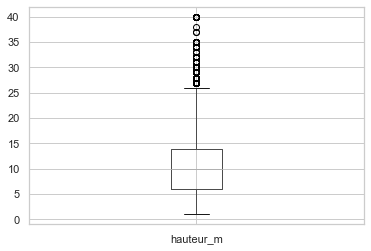

In [404]:
data.boxplot(column="hauteur_m" )

Nous pouvons donc confirmer que nos données sont moins dispersées sans les données aberrantes.

In [405]:
scipy.stats.normaltest(data.hauteur_m)

NormaltestResult(statistic=15866.540147621814, pvalue=0.0)

<AxesSubplot:ylabel='Frequency'>

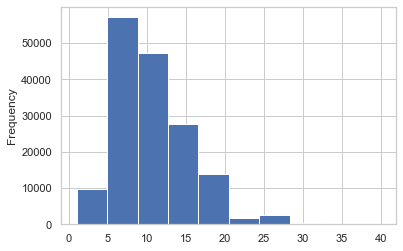

In [406]:
data.hauteur_m.plot(kind='hist')

In [ ]:
En conclusion, il serait judicieux de regrouper les données des variables quantitatives
et de faire des intervalles afin quelles soient plus pertinentes.

## 2) Variables qualitatives

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200086 entries, 0 to 200136
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200086 non-null  int64  
 1   domanialite          200085 non-null  object 
 2   arrondissement       200086 non-null  object 
 3   lieu                 200086 non-null  object 
 4   id_emplacement       200086 non-null  object 
 5   libelle_francais     198589 non-null  object 
 6   genre                200070 non-null  object 
 7   espece               198334 non-null  object 
 8   circonference_cm     200086 non-null  int64  
 9   hauteur_m            200086 non-null  int64  
 10  stade_developpement  132881 non-null  object 
 11  remarquable          200086 non-null  float64
 12  geo_point_2d_a       200086 non-null  float64
 13  geo_point_2d_b       200086 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 22.9+ MB


data.type_emplacement.unique()
Nous avons une seule données pour cette variable.
Nous pouvons la supprimer, elle n'apporte aucune information.

In [243]:
del data['type_emplacement']

In [88]:
data[["domanialite", "arrondissement", "lieu", "libelle_francais", "genre", "espece", "remarquable"]].describe(include='all').round(2)

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,remarquable
count,200085,200086,200086,198589,200070,198334,200086.00
unique,9,25,6921,192,175,539,NaN
top,Alignement,PARIS 15E ARRDT,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Platane,Platanus,x hispanica,NaN
freq,104903,17149,2995,42490,42573,36400,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.00
std,NaN,NaN,NaN,NaN,NaN,NaN,0.03
min,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.00


Nous allons transformer la variable "remarquable" qui prend comme valeur 0/1 en oui/non.

In [244]:
data['remarquable'] = data['remarquable'].replace(0,'Non')
data['remarquable'] = data['remarquable'].replace(1,'Oui')

In [101]:
data[["domanialite", "arrondissement", "lieu", "libelle_francais", "genre", "espece", "remarquable"]].describe(include='all').round(2)

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,remarquable
count,200085,200086,200086,198589,200070,198334,200086
unique,9,25,6921,192,175,539,2
top,Alignement,PARIS 15E ARRDT,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Platane,Platanus,x hispanica,Non
freq,104903,17149,2995,42490,42573,36400,199902


<AxesSubplot:>

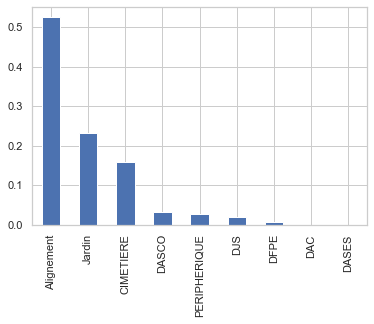

In [106]:
data["domanialite"].value_counts(normalize=True).plot(kind='bar')

Plus de 50% des arbres se trouve dans un alignement.
un peu plus de 20% se trouve dans des jardins et un peu moins de 20% dans des cimetières.
Les autres catégories sont très peu représentées. Il serait peut être judicieux de les regrouper dans une catégorie "Autres".

In [107]:
data["domanialite"].value_counts(normalize=True)

Alignement      0.524292
Jardin          0.231202
CIMETIERE       0.159557
DASCO           0.032086
PERIPHERIQUE    0.026624
DJS             0.019492
DFPE            0.006622
DAC             0.000105
DASES           0.000020
Name: domanialite, dtype: float64

In [245]:
replace_values = {'Alignement':'Alignement', 'Jardin':'Jardin','CIMETIERE':'CIMETIERE', 'DASCO' : 'Autres', 'PERIPHERIQUE' : 'Autres', 'DJS' : 'Autres', 'DFPE': 'Autres', 'DAC':'Autres', 'DASES':'Autres' }  

In [246]:
data['domanialite'] = data['domanialite'].map(replace_values)     

In [178]:
data["domanialite"].value_counts(normalize=True)

Alignement    0.524292
Jardin        0.231202
CIMETIERE     0.159557
Autres        0.084949
Name: domanialite, dtype: float64

In [137]:
max(data["lieu"].value_counts(normalize=True))


0.014968563517687394

In [138]:
min(data["lieu"].value_counts(normalize=True))

4.997850924102636e-06

Les données sont très dispersées dans les différentes catégories.
Pertinence ?

<AxesSubplot:>

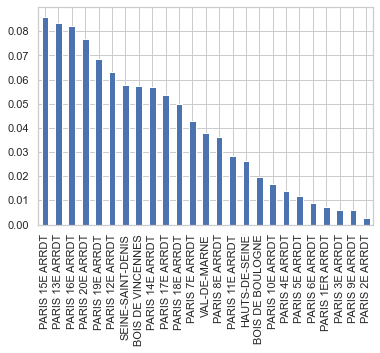

In [131]:
data["arrondissement"].value_counts(normalize=True).plot(kind='bar')

In [179]:
data["libelle_francais"].value_counts(normalize=True)

Platane         0.213959
Marronnier      0.126905
Tilleul         0.107226
Erable          0.092583
Sophora         0.059384
                  ...   
Ostryer         0.000005
Jujubier        0.000005
Maackie         0.000005
Faux dattier    0.000005
Caragana        0.000005
Name: libelle_francais, Length: 192, dtype: float64

In [196]:
type(data)

pandas.core.frame.DataFrame

In [327]:
data["libelle_francais"].value_counts(normalize=True)

Platane         0.213959
Marronnier      0.126905
Tilleul         0.107226
Erable          0.092583
Sophora         0.059384
                  ...   
Ostryer         0.000005
Jujubier        0.000005
Maackie         0.000005
Faux dattier    0.000005
Caragana        0.000005
Name: libelle_francais, Length: 192, dtype: float64

In [328]:
info_lib=(data["libelle_francais"].value_counts(normalize=True)>0.01)


In [329]:
info_lib.value_counts(normalize=True)

False    0.90625
True     0.09375
Name: libelle_francais, dtype: float64

90% des catégories représentent moins de 1% les arbres.
Les données sont très dispersées.
On peut faire un regroupement Autres

In [358]:
info_lib=(data["libelle_francais"].value_counts(normalize=True)>0.001)

In [359]:
info_lib=list(info_lib.loc[info_lib== True].index)

In [360]:
info_lib

['Platane',
 'Marronnier',
 'Tilleul',
 'Erable',
 'Sophora',
 'Frêne',
 'Pin',
 'Micocoulier',
 'Chêne',
 'Cerisier à fleurs',
 'Charme',
 'Poirier à fleurs',
 'Noisetier de Byzance',
 'Peuplier',
 'Robinier',
 'Bouleau',
 'Orme',
 'If',
 'Hêtre',
 'Paulownia',
 'Fevier',
 'Faux-cyprès',
 'Cyprès',
 'Noyer',
 'Tulipier',
 'Magnolia',
 'Cedrele',
 'Arbre de Judée',
 'Pterocarya',
 'Prunier à fleurs',
 'Ailante',
 'Arbre aux quarante écus',
 'Mûrier',
 'Cèdre',
 'Pommier à fleurs',
 'Frêne à fleurs',
 'Copalme',
 'Aulne',
 'Pommier à fruits',
 'Merisier',
 'Prunus n. sp.',
 'Savonnier',
 'Catalpa',
 'Non spécifié',
 'Charme-Houblon',
 'Lilas des indes',
 'Thuya',
 'Saule',
 'Troene',
 'Pommier',
 'Amélanchier',
 'Poirier à fruits',
 'Houx',
 'Cerisier à grappes',
 'Orme de Sibérie',
 'Aubépine',
 'Cornouiller',
 'Parrotie de Perse - Arbre de fer',
 'Alisier',
 'Arbre à soie',
 'Chicot du Canada']

In [361]:
def map_lib(lib):
    if lib in info_lib:
        return lib
    else:
        return "Autres"

In [362]:
data["libelle_francais"]=data["libelle_francais"].map(map_lib, na_action=None)

In [363]:
data["libelle_francais"]

0         Marronnier
1                 If
2                 If
3             Erable
4             Autres
             ...    
200132        Autres
200133        Autres
200134      Peuplier
200135         Chêne
200136        Autres
Name: libelle_francais, Length: 200086, dtype: object

In [364]:
data["libelle_francais"].value_counts(normalize=True)

Platane                             0.212359
Marronnier                          0.125956
Tilleul                             0.106424
Erable                              0.091890
Sophora                             0.058940
                                      ...   
Cornouiller                         0.001544
Parrotie de Perse - Arbre de fer    0.001504
Alisier                             0.001229
Arbre à soie                        0.001199
Chicot du Canada                    0.000995
Name: libelle_francais, Length: 62, dtype: float64

In [365]:
data["libelle_francais"].describe(include='all')

count      200086
unique         62
top       Platane
freq        42490
Name: libelle_francais, dtype: object

<AxesSubplot:>

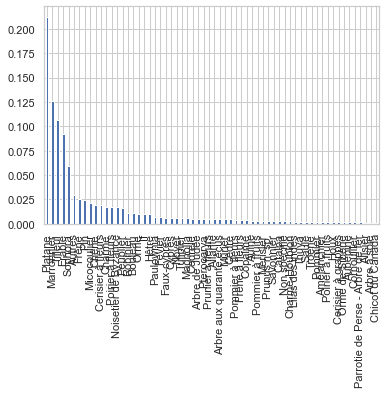

In [338]:
data["libelle_francais"].value_counts(normalize=True).plot(kind='bar')

In [ ]:
on conserve 62 catégories afin de ne pas surreprésenter la donnée Autres dans le jeu de données.

In [340]:
data["genre"].value_counts(normalize=True)

Platanus       0.212791
Aesculus       0.126636
Tilia          0.107657
Acer           0.092308
Sophora        0.059109
                 ...   
Phoenix        0.000005
Cinnamomum     0.000005
Phyllanthus    0.000005
Caragana       0.000005
Maackia        0.000005
Name: genre, Length: 175, dtype: float64

In [342]:
info_g=(data["genre"].value_counts(normalize=True)>0.01)

In [345]:
info_g.value_counts(normalize=True)

False    0.897143
True     0.102857
Name: genre, dtype: float64

In [367]:
def map_lib(lib):
    if lib in info_g:
        return lib
    else:
        return "Autres"
    
info_g=(data["genre"].value_counts(normalize=True)>0.001)
info_g=list(info_g.loc[info_g== True].index)
data["genre"]=data["genre"].map(map_lib, na_action=None)

In [368]:
data["genre"].describe()

count       200086
unique          56
top       Platanus
freq         42573
Name: genre, dtype: object

<AxesSubplot:>

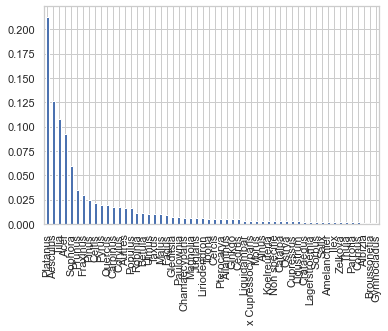

In [350]:
data["genre"].value_counts(normalize=True).plot(kind='bar')

In [351]:
data["espece"].value_counts(normalize=True)

x hispanica                     0.183529
hippocastanum                   0.101022
japonica                        0.059586
n. sp.                          0.045686
tomentosa                       0.045121
                                  ...   
procera                         0.000005
bipinnata                       0.000005
fruticosa                       0.000005
camphora                        0.000005
occidentalis var. reticulata    0.000005
Name: espece, Length: 539, dtype: float64

In [369]:
info_e=(data["espece"].value_counts(normalize=True)>0.01)
info_e.value_counts(normalize=True)

False    0.959184
True     0.040816
Name: espece, dtype: float64

In [373]:
def map_lib_e(lib):
    if lib in info_e:
        return lib
    else:
        return "Autres"
    
info_e=(data["espece"].value_counts(normalize=True)>0.002)
info_e=list(info_e.loc[info_e== True].index)
data["espece"]=data["espece"].map(map_lib_e, na_action=None)

In [374]:
data['espece'].describe()

count          200086
unique             58
top       x hispanica
freq            36400
Name: espece, dtype: object

<AxesSubplot:>

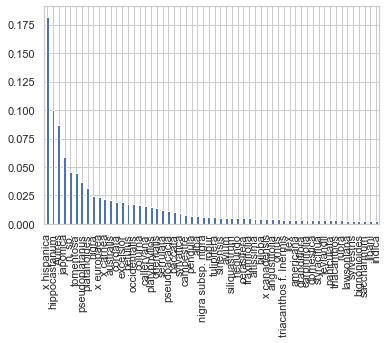

In [375]:
data["espece"].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:ylabel='remarquable'>

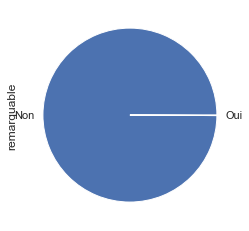

In [376]:
data["remarquable"].value_counts(normalize=True).plot(kind='pie')

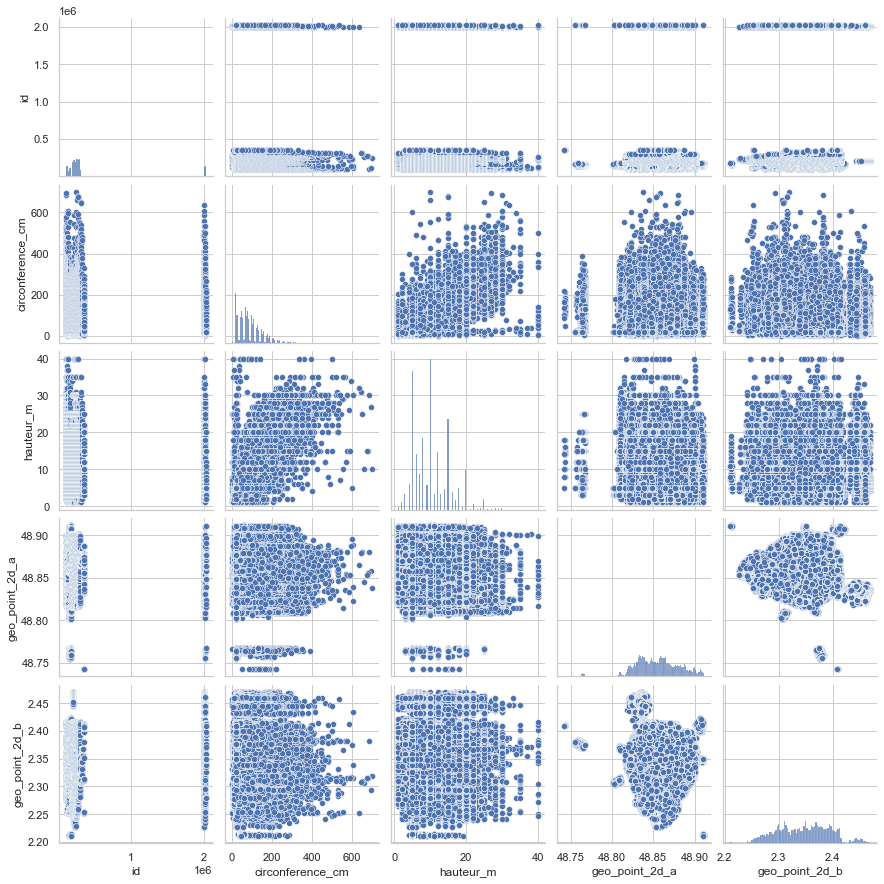

In [407]:
sns.pairplot(data)

# Synthèse de l’analyse de données

In [ ]:
En général les données sont très dispersées.